In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np # this is the only math library,
#you are allowed to import!!
from math import atan, sin, cos

In [2]:
def show_2d(vertices, edges, size):
    fig = plt.figure()
    ax = fig.gca()
    for edge in edges:
        p1 = vertices[edge[0]]        
        p2 = vertices[edge[1]]
        ax.plot([p1[0], p2[0]], 
                [p1[1], p2[1]])
    ax.set_xlim(0, size[0])
    ax.set_ylim(0, size[1])
    plt.show()

In [3]:
def show_3d(vertices, edges):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    for edge in edges:
        p1 = vertices[edge[0]]
        p2 = vertices[edge[1]]
        ax.plot([p1[0], p2[0]], 
                [p1[1], p2[1]], 
                [p1[2], p2[2]])
    ax.set_ylim(-5, 5)
    ax.set_xlim(-5, 5)
    ax.set_zlim(-5, 5)
    plt.show()

### Define a cube as a numpy array with 8 corners

In [4]:
vertices = np.array([[-1, -1, -1],
                     [1, -1, -1],
                     [1, 1, -1],
                     [-1, 1, -1],
                     [-1, -1, 1],
                     [1, -1, 1],
                     [1, 1, 1],
                     [-1, 1, 1]])

edges = [(0,1), (2,3), (4,5), (6,7), 
         (0,3), (1,2), (4,7), (5,6),
         (0,4), (1,5), (2,6), (3,7)]

### Insert code that shows the cube using the function show_3d.

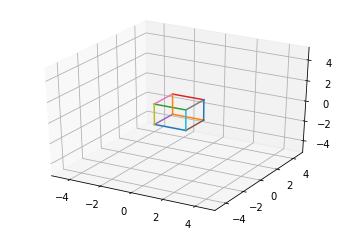

In [5]:
show_3d(vertices, edges)

In [224]:
theta = 0.1
u = [0, 1, 0]
ux = u[0]
uy = u[1]
uz = u[2]

In [218]:
camera_position = np.array([0,0,-3])
camera_orientation = np.array([0,0.1,0])

In [225]:
R = [[cos(theta)+(ux**2)*(1-cos(theta)), ux*uy*(1-cos(theta))-uz*sin(theta), ux*uz*(1-cos(theta))+uy*sin(theta)],
     [uy*uz*(1-cos(theta))+uz*sin(theta), cos(theta)+(uy**2)*(1-cos(theta)), uy*uz*(1-cos(theta))-uz*sin(theta)],
     [uz*ux*(1-cos(theta))-uy*sin(theta), uz*uy*(1-cos(theta))+uz*sin(theta), cos(theta)+(uz**2)*(1-cos(theta))]]
R

[[1.0, -0.09483758192485398, 0.10482925136880233],
 [0.10482925136880233, 1.0, -0.09483758192485398],
 [-0.09483758192485398, 0.10482925136880233, 1.0]]

In [120]:
zero = np.array([0, 0, 0])
tmp = np.hstack([R, zero.reshape(3, 1)])
R = np.vstack([tmp, [0, 0, 0, 1]])
R

array([[ 0.99500417,  0.        ,  0.09983342,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ],
       [-0.09983342,  0.        ,  0.99500417,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [79]:
I = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])
c = camera_position

In [82]:
tmp = np.hstack([I, -c.reshape(3, 1)])
T = np.vstack([tmp, [0, 0, 0, 1]])
T

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 3],
       [0, 0, 0, 1]])

In [89]:
t = np.array([1, 1, 1, 1, 1, 1, 1, 1])
t

array([1, 1, 1, 1, 1, 1, 1, 1])

In [101]:
rr = np.hstack([vertices, t.reshape(8, 1)])
rr

array([[-1, -1, -1,  1],
       [ 1, -1, -1,  1],
       [ 1,  1, -1,  1],
       [-1,  1, -1,  1],
       [-1, -1,  1,  1],
       [ 1, -1,  1,  1],
       [ 1,  1,  1,  1],
       [-1,  1,  1,  1]])

In [110]:
xx = np.dot(T, rr.T)
dd = xx.T
dd

array([[-1, -1,  2,  1],
       [ 1, -1,  2,  1],
       [ 1,  1,  2,  1],
       [-1,  1,  2,  1],
       [-1, -1,  4,  1],
       [ 1, -1,  4,  1],
       [ 1,  1,  4,  1],
       [-1,  1,  4,  1]])

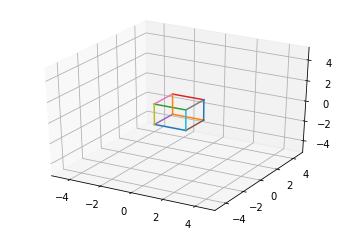

In [98]:
show_3d(vertices, edges)

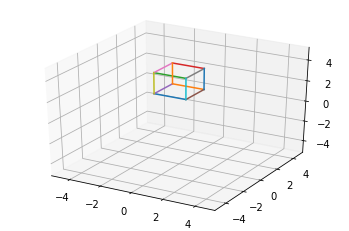

In [114]:
show_3d(dd, edges)

In [189]:
vv= np.dot(R, dd.T)
vv = vv.T
vv

array([[-0.79533733, -1.        ,  2.08984175,  1.        ],
       [ 1.194671  , -1.        ,  1.89017491,  1.        ],
       [ 1.194671  ,  1.        ,  1.89017491,  1.        ],
       [-0.79533733,  1.        ,  2.08984175,  1.        ],
       [-0.5956705 , -1.        ,  4.07985008,  1.        ],
       [ 1.39433783, -1.        ,  3.88018324,  1.        ],
       [ 1.39433783,  1.        ,  3.88018324,  1.        ],
       [-0.5956705 ,  1.        ,  4.07985008,  1.        ]])

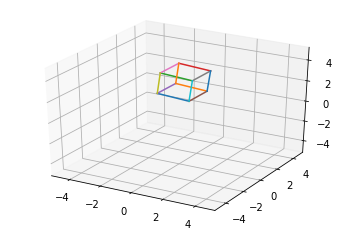

In [131]:
show_3d(vv, edges)

In [170]:
pro = np.array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0]])

In [187]:
gg = np.dot(pro, vv.T)
gg = gg.T
gg.shape

(8, 3)

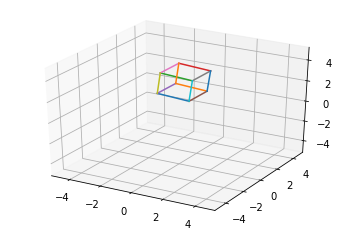

In [138]:
show_3d(gg, edges)

In [208]:
f = -0.55
#f = 200
sx = 0.5
sy = 0.5
ii = [[f, 0, sx],
      [0, f, sy],
      [0, 0, 1]]
ii

[[-0.55, 0, 0.5], [0, -0.55, 0.5], [0, 0, 1]]

In [209]:
tmp = np.dot(ii, pro)
tmp

array([[-0.55,  0.  ,  0.5 ,  0.  ],
       [ 0.  , -0.55,  0.5 ,  0.  ],
       [ 0.  ,  0.  ,  1.  ,  0.  ]])

In [210]:
ll = np.dot(R, T.T)
ll = ll.T
ll

array([[ 0.99500417,  0.        , -0.09983342,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.09983342,  0.        ,  0.99500417,  3.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [186]:
kk = np.dot(tmp, ll.T)
kk = kk.T
kk.shape

(4, 3)

In [211]:
pp = np.dot(ii, gg.T)
pp = pp.T
pp

array([[1.48235641, 1.59492087, 2.08984175],
       [0.28801841, 1.49508746, 1.89017491],
       [0.28801841, 0.39508746, 1.89017491],
       [1.48235641, 0.49492087, 2.08984175],
       [2.36754381, 2.58992504, 4.07985008],
       [1.17320581, 2.49009162, 3.88018324],
       [1.17320581, 1.39009162, 3.88018324],
       [2.36754381, 1.48992504, 4.07985008]])

In [212]:
las = pp[:, 2]
las = las.T
las

array([2.08984175, 1.89017491, 1.89017491, 2.08984175, 4.07985008,
       3.88018324, 3.88018324, 4.07985008])

In [213]:
fo = pp[:, :2]
fo

array([[1.48235641, 1.59492087],
       [0.28801841, 1.49508746],
       [0.28801841, 0.39508746],
       [1.48235641, 0.49492087],
       [2.36754381, 2.58992504],
       [1.17320581, 2.49009162],
       [1.17320581, 1.39009162],
       [2.36754381, 1.48992504]])

In [214]:
ex = fo / las.reshape(-1,1)
ex = ex * 200


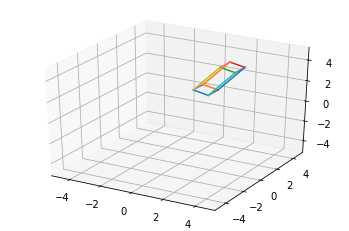

In [164]:
show_3d(pp, edges)

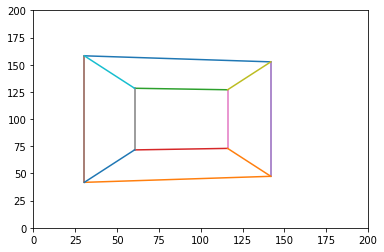

In [215]:
show_2d(ex, edges, (200, 200))

In [12]:
def get_extrinsic_matrix(position,orientation):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-12-db385df32850>, line 2)